<a href="https://colab.research.google.com/github/DepartmentOfStatisticsPUE/air-2020/blob/master/notebooks/6_merge_os_glob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Łączenie danych

1. cel -  wczytanie danych z plików MS Excel i połączenie ich z  funkcją `pd.concat`

In [0]:
import pandas as pd
import numpy as np
import os
import glob

In [0]:
!pwd

/content


In [0]:
dane2016 = pd.read_excel(io = '/content/wyn_2016.xlsx', sheet_name = 1)
dane2018 = pd.read_excel(io = "/content/wyn_2018.xlsx", sheet_name = 1)

Stosujemy funkcję `pd.concat`

In [0]:
dane_razem = pd.concat(objs = [dane2016, dane2018])
dane_razem.Rok.value_counts()
dane_razem.head()
dane_razem.groupby("Rok").Wartosc.mean()

Rok
2016    3661.146711
2018    4142.137868
Name: Wartosc, dtype: float64

In [0]:
df2016 = dane2016[["Kod", "Wartosc"]]
df2018 = dane2018[["Kod", "Wartosc"]]
df2016 = df2016.rename(columns= {"Wartosc": "wynagrodzenia2016"})
df2018 = df2018.rename(columns= {"Wartosc": "wynagrodzenia2018"})
df2016.head()

,Kod,wynagrodzenia2016
0,201000,3666.19
1,202000,3562.63
2,203000,3723.59
3,204000,3386.93
4,205000,3546.24


Łączymy dane z 2016 roku z danymi z 2018 roku po kluczu "Kod"

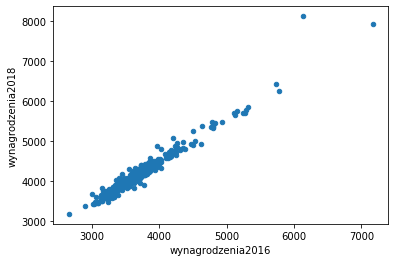

In [0]:
wynik = pd.merge(left = df2016, right=df2018, how = "inner", on = "Kod")
wynik.head()

wynik.plot.scatter("wynagrodzenia2016", "wynagrodzenia2018")

Wykonamy łączenie left join czyli do zbioru pierwszego dołączymy drugi ale bierzemy wszystko ze zbioru pierwszego

In [0]:
left_join = pd.merge(left = df2016, right = df2018, how = "left")
left_join.head()

,Kod,wynagrodzenia2016,wynagrodzenia2018
0,201000,3666.19,4214.66
1,202000,3562.63,4024.94
2,203000,3723.59,4077.69
3,204000,3386.93,3815.89
4,205000,3546.24,4029.64


Zmieniamy nazwy zmiennych określających klucz


In [0]:
df2016 = df2016.rename(columns = {"Kod": "kod2016"})
df2018 = df2018.rename(columns = {"Kod": "kod2018"})
df2018.head()

,kod2018,wynagrodzenia2018
0,201000,4214.66
1,202000,4024.94
2,203000,4077.69
3,204000,3815.89
4,205000,4029.64


In [0]:
razem2=pd.merge(left = df2016, right = df2018, left_on = "kod2016", right_on = "kod2018")
razem2.head()

,kod2016,wynagrodzenia2016,kod2018,wynagrodzenia2018
0,201000,3666.19,201000,4214.66
1,202000,3562.63,202000,4024.94
2,203000,3723.59,203000,4077.69
3,204000,3386.93,204000,3815.89
4,205000,3546.24,205000,4029.64


# Funkcja map


map(funkcja, obiekt interwalny)


In [0]:
wektory = [ [1,  2, 5, 6, 1], [3, 325, 32, 25, 6]] 
wektory

## po elementach wypisując je
np.mean(wektory[0])
np.mean(wektory[1])

## w pętli
for i in [0,1]:
  print(np.mean(wektory[i]))

3.0
78.2


In [0]:
wynik = map(np.mean, wektory)
list(wynik)



[3.0, 78.2]

Wczytujemy pliki MS Excel z dysku  z wykorzystaniem funkcji map

In [0]:
dane = map(pd.read_excel, 
           ["/content/wyn_2016.xlsx", "/content/wyn_2018.xlsx"])
list(dane)

In [0]:
def read_excels(io, sheet=1):
  ark = pd.read_excel(io, sheet_name = sheet)
  return(ark)

In [0]:
dane = map(read_excels, 
           ["/content/wyn_2016.xlsx", "/content/wyn_2018.xlsx"])

pd.concat(dane).Rok.value_counts()

2018    380
2016    380
Name: Rok, dtype: int64

# Pokazujemy jakie pliki są w określonym folderze

Wykorzystamy do tego funkcję z modułu `os`

In [0]:
pliki = os.listdir("/content")

[i.endswith("xlsx") for i in pliki] ## comprehension

[False, True, False, True]

In [0]:
glob.glob("/content/*.xlsx")

['/content/wyn_2018.xlsx', '/content/wyn_2016.xlsx']